Neural Networks

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Input vector

In [2]:
X = np.array([[1, 2, 0, 2], [1, 1, 0, 1], [2, 2, 0, 1], [1, 3, 1, 1], [2, 1, 3, 1], [2, 2, 1, 1]]) 

In [3]:
print("The input vector is: ", X)
print("Shape of input vector is: ", X.shape)

The input vector is:  [[1 2 0 2]
 [1 1 0 1]
 [2 2 0 1]
 [1 3 1 1]
 [2 1 3 1]
 [2 2 1 1]]
Shape of input vector is:  (6, 4)


In [4]:
#Converting the input vector into matrix form
X = X.T
X

array([[1, 1, 2, 1, 2, 2],
       [2, 1, 2, 3, 1, 2],
       [0, 0, 0, 1, 3, 1],
       [2, 1, 1, 1, 1, 1]])

In [5]:
#shape of the input matrix
print("The shape of input matrix is: ", X.shape)

The shape of input matrix is:  (4, 6)


In [6]:
#Output Y of the samples
Y = np.array([[1], [0], [1], [1], [0], [1]])

In [7]:
Y = Y.T
print("The output of the variable is: ", Y)
print("The shape of the output is: ", Y.shape)

The output of the variable is:  [[1 0 1 1 0 1]]
The shape of the output is:  (1, 6)


The Architecture of Neural Network

In [8]:
input_layer_neurons = X.shape[0]
output_layer_neurons = Y.shape[0]
hidden_layer_neurons = 5

In [9]:
#initializing the weights of Neural Network
Wih = np.random.uniform(size = (input_layer_neurons, hidden_layer_neurons))

Woh = np.random.uniform(size = (hidden_layer_neurons, output_layer_neurons))

Wih.shape, Woh.shape

((4, 5), (5, 1))

Performing Forward Propagation 

In [10]:
#defining sigmoid activation function
def sigmoid(X):
  return 1/(1+np.exp(-X))

In [11]:
#calculating Z function and activating the first hidden layer
hidden_layer_input  = np.dot(Wih.T, X)
hidden_layer_activations = sigmoid(hidden_layer_input)

In [12]:
output_layer_input = np.dot(Woh.T, hidden_layer_activations)
output = sigmoid(output_layer_input)

In [13]:
output

array([[0.89141511, 0.86938005, 0.89085501, 0.89521061, 0.9019318 ,
        0.89769943]])

Backward Propagation

Rate of change of error with respect to Weights between hidden layer and output layer.

In [14]:
## defining learning rate
lr = 0.01

In [15]:
## Error 
error = np.square(output-Y)/2
error

array([[0.00589534, 0.37791083, 0.00595631, 0.00549041, 0.40674049,
        0.0052327 ]])

To calculate this we will need
1. Rate of change of error with respect to output 
2. Rate of change of output with respect to hidden_layer_output
3. Rate of change of Hidden layer output with respect to Weights between hidden layer and output  

In [16]:
## Rate of change of error with respect to output
error_wrt_output = ( output - Y )
error_wrt_output

array([[-0.10858489,  0.86938005, -0.10914499, -0.10478939,  0.9019318 ,
        -0.10230057]])

In [17]:
## Rate of change of output with respect to hidden_layer_output
output_wrt_z2 = output * ( 1 - output )
output_wrt_z2

array([[0.09679421, 0.11355838, 0.09723236, 0.09380858, 0.08845083,
        0.09183516]])

In [18]:
## Rate of change of Hidden layer output with respect to Weights between hidden layer and output
z2_wrt_Who = hidden_layer_activations
z2_wrt_Who

array([[0.96730885, 0.8791202 , 0.95113823, 0.97086021, 0.99106324,
        0.97547453],
       [0.87142144, 0.77540176, 0.87727843, 0.877827  , 0.95359018,
        0.91476651],
       [0.92901011, 0.83327173, 0.93134263, 0.96315696, 0.99397911,
        0.97228994],
       [0.98134345, 0.91161961, 0.98029143, 0.9871936 , 0.97935085,
        0.98493998],
       [0.96404322, 0.85837145, 0.93214791, 0.96544626, 0.97540841,
        0.9585694 ]])

In [19]:
Woh = Woh - lr * np.dot(z2_wrt_Who, (error_wrt_output * output_wrt_z2).T)
Woh

array([[0.14115573],
       [0.53437229],
       [0.98130388],
       [0.33473919],
       [0.2666786 ]])

Caculating Rate of Change of Error with respect to weights between input layer and hidden layer

To calculate Rate of Change of Error with respect to weights between input layer and hidden layer, We need :
1. rate of change of Error wrt Output layer
2. rate of change of Output wrt hidden layer output
3. rate of change of hidden layer output wrt hidden layer activation 
4. rate of change of hidden layer activation wrt hidden layer input
5. rate of change of hidden layer input wrt weights between input and hidden layer

In [20]:
## rate of change of hidden layer output wrt activation of hidden layer
z2_wrt_h1 = Woh
z2_wrt_h1

array([[0.14115573],
       [0.53437229],
       [0.98130388],
       [0.33473919],
       [0.2666786 ]])

In [21]:
## rate of change of hidden layer activation wrt input of hidden layer
h1_wrt_z1 = np.multiply(hidden_layer_activations, ( 1 - hidden_layer_activations ))
h1_wrt_z1

array([[0.03162244, 0.10626787, 0.0464743 , 0.02829066, 0.0088569 ,
        0.02392397],
       [0.11204611, 0.17415387, 0.10766099, 0.10724676, 0.04425595,
        0.07796874],
       [0.06595032, 0.13892995, 0.06394353, 0.03548563, 0.00598464,
        0.02694221],
       [0.01830848, 0.0805693 , 0.01932014, 0.0126424 , 0.02022276,
        0.01483321],
       [0.03466389, 0.12156991, 0.06324819, 0.03335978, 0.02398684,
        0.03971411]])

In [22]:
## rate of change of hidden layer input wrt weights between hidden layer and input layer
z1_wrt_Wih = X
z1_wrt_Wih

array([[1, 1, 2, 1, 2, 2],
       [2, 1, 2, 3, 1, 2],
       [0, 0, 0, 1, 3, 1],
       [2, 1, 1, 1, 1, 1]])

In [23]:
Wih = Wih - lr * np.dot(z1_wrt_Wih,(h1_wrt_z1*np.dot(z2_wrt_h1,(output_wrt_z2*error_wrt_output))).T)
Wih

array([[0.5808226 , 0.56445289, 0.64629123, 0.70438589, 0.31480509],
       [0.40369093, 0.16322642, 0.35200053, 0.86877643, 0.50346527],
       [0.71454546, 0.40632106, 0.95035166, 0.27372573, 0.52124747],
       [0.99957239, 0.51114744, 0.61037699, 0.76031994, 0.98346547]])

Training the model

In [24]:
#defining model Architecture
input_layer_neurons = X.shape[0]
output_layer_neurons = Y.shape[0]
hidden_layer_neurons = 5

#initializing weights
Wih = np.random.uniform(size = (input_layer_neurons, hidden_layer_neurons))

Woh = np.random.uniform(size = (hidden_layer_neurons, output_layer_neurons))

#defining parameters
lr = 0.01
epochs = 1000

In [25]:
#initial Weights
Wih

array([[0.32998164, 0.29388347, 0.8511634 , 0.42981943, 0.61323418],
       [0.91860981, 0.18094836, 0.86757864, 0.16731247, 0.32838043],
       [0.32812495, 0.00117566, 0.98302157, 0.07652087, 0.58982053],
       [0.30618649, 0.70975559, 0.9486899 , 0.77060692, 0.68803389]])

In [26]:
Woh 

array([[0.58710575],
       [0.04681739],
       [0.39066544],
       [0.44934998],
       [0.50124421]])

In [27]:
error_epochs = []

for i in range(epochs):

  #forward Propagation
  #hidden layer activations
  hidden_layer_input  = np.dot(Wih.T, X)
  hidden_layer_activations = sigmoid(hidden_layer_input)

  output_layer_input = np.dot(Woh.T, hidden_layer_activations)
  output = sigmoid(output_layer_input)

  ##Backward Propagation

  #calculating error
  error = np.square(output-Y)/2
  error_wrt_output = ( output - Y )
  output_wrt_z2 = output * ( 1 - output )
  z2_wrt_Who = hidden_layer_activations
  z2_wrt_h1 = Woh
  h1_wrt_z1 = np.multiply(hidden_layer_activations, ( 1 - hidden_layer_activations ))
  z1_wrt_Wih = X

  Woh = Woh - lr * np.dot(z2_wrt_Who, (error_wrt_output * output_wrt_z2).T)
  Wih = Wih - lr * np.dot(z1_wrt_Wih,(h1_wrt_z1*np.dot(z2_wrt_h1,(output_wrt_z2*error_wrt_output))).T)

  error_epochs.append(np.average(error))

In [28]:
Wih

array([[ 0.24175936,  0.31442626,  0.84278975,  0.3821143 ,  0.59784313],
       [ 0.89756349,  0.14064606,  0.86093352,  0.21329625,  0.34571093],
       [ 0.23319212,  0.05823966,  0.98282051, -0.01677927,  0.5833851 ],
       [ 0.24391365,  0.71779018,  0.94018761,  0.74533528,  0.67256636]])

In [29]:
Woh

array([[ 0.42282973],
       [-0.14775379],
       [ 0.06168898],
       [ 0.23834194],
       [ 0.21667166]])

In [30]:
error_epochs

[0.12759641449243145,
 0.1274576630938442,
 0.12731884065998003,
 0.12717995783365288,
 0.12704102538214668,
 0.1269020541948273,
 0.12676305528063322,
 0.1266240397654446,
 0.12648501888933197,
 0.12634600400368215,
 0.12620700656820288,
 0.12606803814780576,
 0.12592911040936763,
 0.1257902351183711,
 0.12565142413542438,
 0.12551268941266172,
 0.12537404299002466,
 0.12523549699142583,
 0.12509706362079606,
 0.12495875515801642,
 0.12482058395473707,
 0.1246825624300838,
 0.12454470306625547,
 0.12440701840401347,
 0.12426952103806614,
 0.12413222361235032,
 0.1239951388152129,
 0.12385827937449527,
 0.12372165805252365,
 0.12358528764100889,
 0.12344918095585833,
 0.12331335083190458,
 0.12317781011755391,
 0.12304257166935893,
 0.12290764834651935,
 0.12277305300531532,
 0.1226387984934777,
 0.1225048976445,
 0.12237136327189696,
 0.12223820816341413,
 0.12210544507519433,
 0.12197308672590547,
 0.12184114579083598,
 0.12170963489596211,
 0.12157856661199416,
 0.12144795344840603,

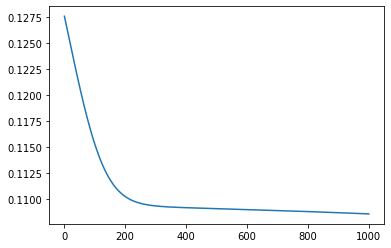

In [31]:
plt.plot(np.arange(1,epochs+1), np.array(error_epochs))

In [32]:
# final output from the model
output

array([[0.67712712, 0.65757333, 0.67660674, 0.6809165 , 0.67609516,
        0.67914606]])

In [33]:
# actual target
Y

array([[1, 0, 1, 1, 0, 1]])

In [34]:
# error at last epoch
error

array([[0.05212345, 0.21620134, 0.0522916 , 0.05090714, 0.22855233,
        0.05147363]])